# Laboratory work #11 L1 and L2 Regularization

In this work your goal is to get yourself familiar with Ridge and Lasso Regression: L1 and L2 Regularization.

You can collaborate with your teammate to complete this laboratory work - in a team of 2 students.

## Task 1 Introduction
1. Create a team of two students and choose a dataset suitable for regression task, that you have not used previously. You can use www.kaggle.com or any similar resources of datasets. 
2. Describe you dataset - what kind of information does it contain, what are the features, what is the target value?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')
# df = pd.read_csv('Breast_cancer_data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [3]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## Task 2 Data preprocessing

Perform preprocessing on your data - get rid of NANs, outliers and corrupted data, encode categorical data and perform scaling if necessary.

In [4]:
df = df.dropna()

In [5]:
df1=df.copy()
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

df1=df1[~((df1 < (Q1-1.5*IQR)) | (df1 > (Q3+1.5*IQR))).any(axis=1)]

In [6]:
print(df.shape) 
print(df1.shape)

(8084, 16)
(5869, 16)


In [7]:
make_array = df1.Make.unique()
make_dict = {}
for i in range(len(make_array)):
    make_dict[make_array[i]] = i
    
df1.Make = df1.Make.replace(make_dict)

In [8]:
eft_array = df1['Engine Fuel Type'].unique()
eft_dict = {}
for i in range(len(eft_array)):
    eft_dict[eft_array[i]] = i
    
df1['Engine Fuel Type'] = df1['Engine Fuel Type'].replace(eft_dict)

In [9]:
kpp_array = df1['Transmission Type'].unique()
kpp_dict = {}
for i in range(len(kpp_array)):
    kpp_dict[kpp_array[i]] = i
    
df1['Transmission Type'] = df1['Transmission Type'].replace(kpp_dict)

In [10]:
dw_array = df1['Driven_Wheels'].unique()
dw_dict = {}
for i in range(len(dw_array)):
    dw_dict[dw_array[i]] = i
    
df1['Driven_Wheels'] = df1['Driven_Wheels'].replace(dw_dict)

In [11]:
mc_array = df1['Market Category'].unique()
mc_dict = {}
for i in range(len(mc_array)):
    mc_dict[mc_array[i]] = i
    
df1['Market Category'] = df1['Market Category'].replace(mc_dict)

In [12]:
vsize_array = df1['Vehicle Size'].unique()
vsize_dict = {}
for i in range(len(vsize_array)):
    vsize_dict[vsize_array[i]] = i
    
df1['Vehicle Size'] = df1['Vehicle Size'].replace(vsize_dict)

In [13]:
vstyle_array = df1['Vehicle Style'].unique()
vstyle_dict = {}
for i in range(len(vstyle_array)):
    vstyle_dict[vstyle_array[i]] = i
    
df1['Vehicle Style'] = df1['Vehicle Style'].replace(vstyle_dict)

In [14]:
df1 = df1.drop(['Model'], axis=1)
df1.head()

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,0,2011,0,335.0,6.0,0,0,2.0,0,0,0,26,19,3916,46135
1,0,2011,0,300.0,6.0,0,0,2.0,1,0,1,28,19,3916,40650
2,0,2011,0,300.0,6.0,0,0,2.0,2,0,0,28,20,3916,36350
3,0,2011,0,230.0,6.0,0,0,2.0,1,0,0,28,18,3916,29450
4,0,2011,0,230.0,6.0,0,0,2.0,3,0,1,28,18,3916,34500


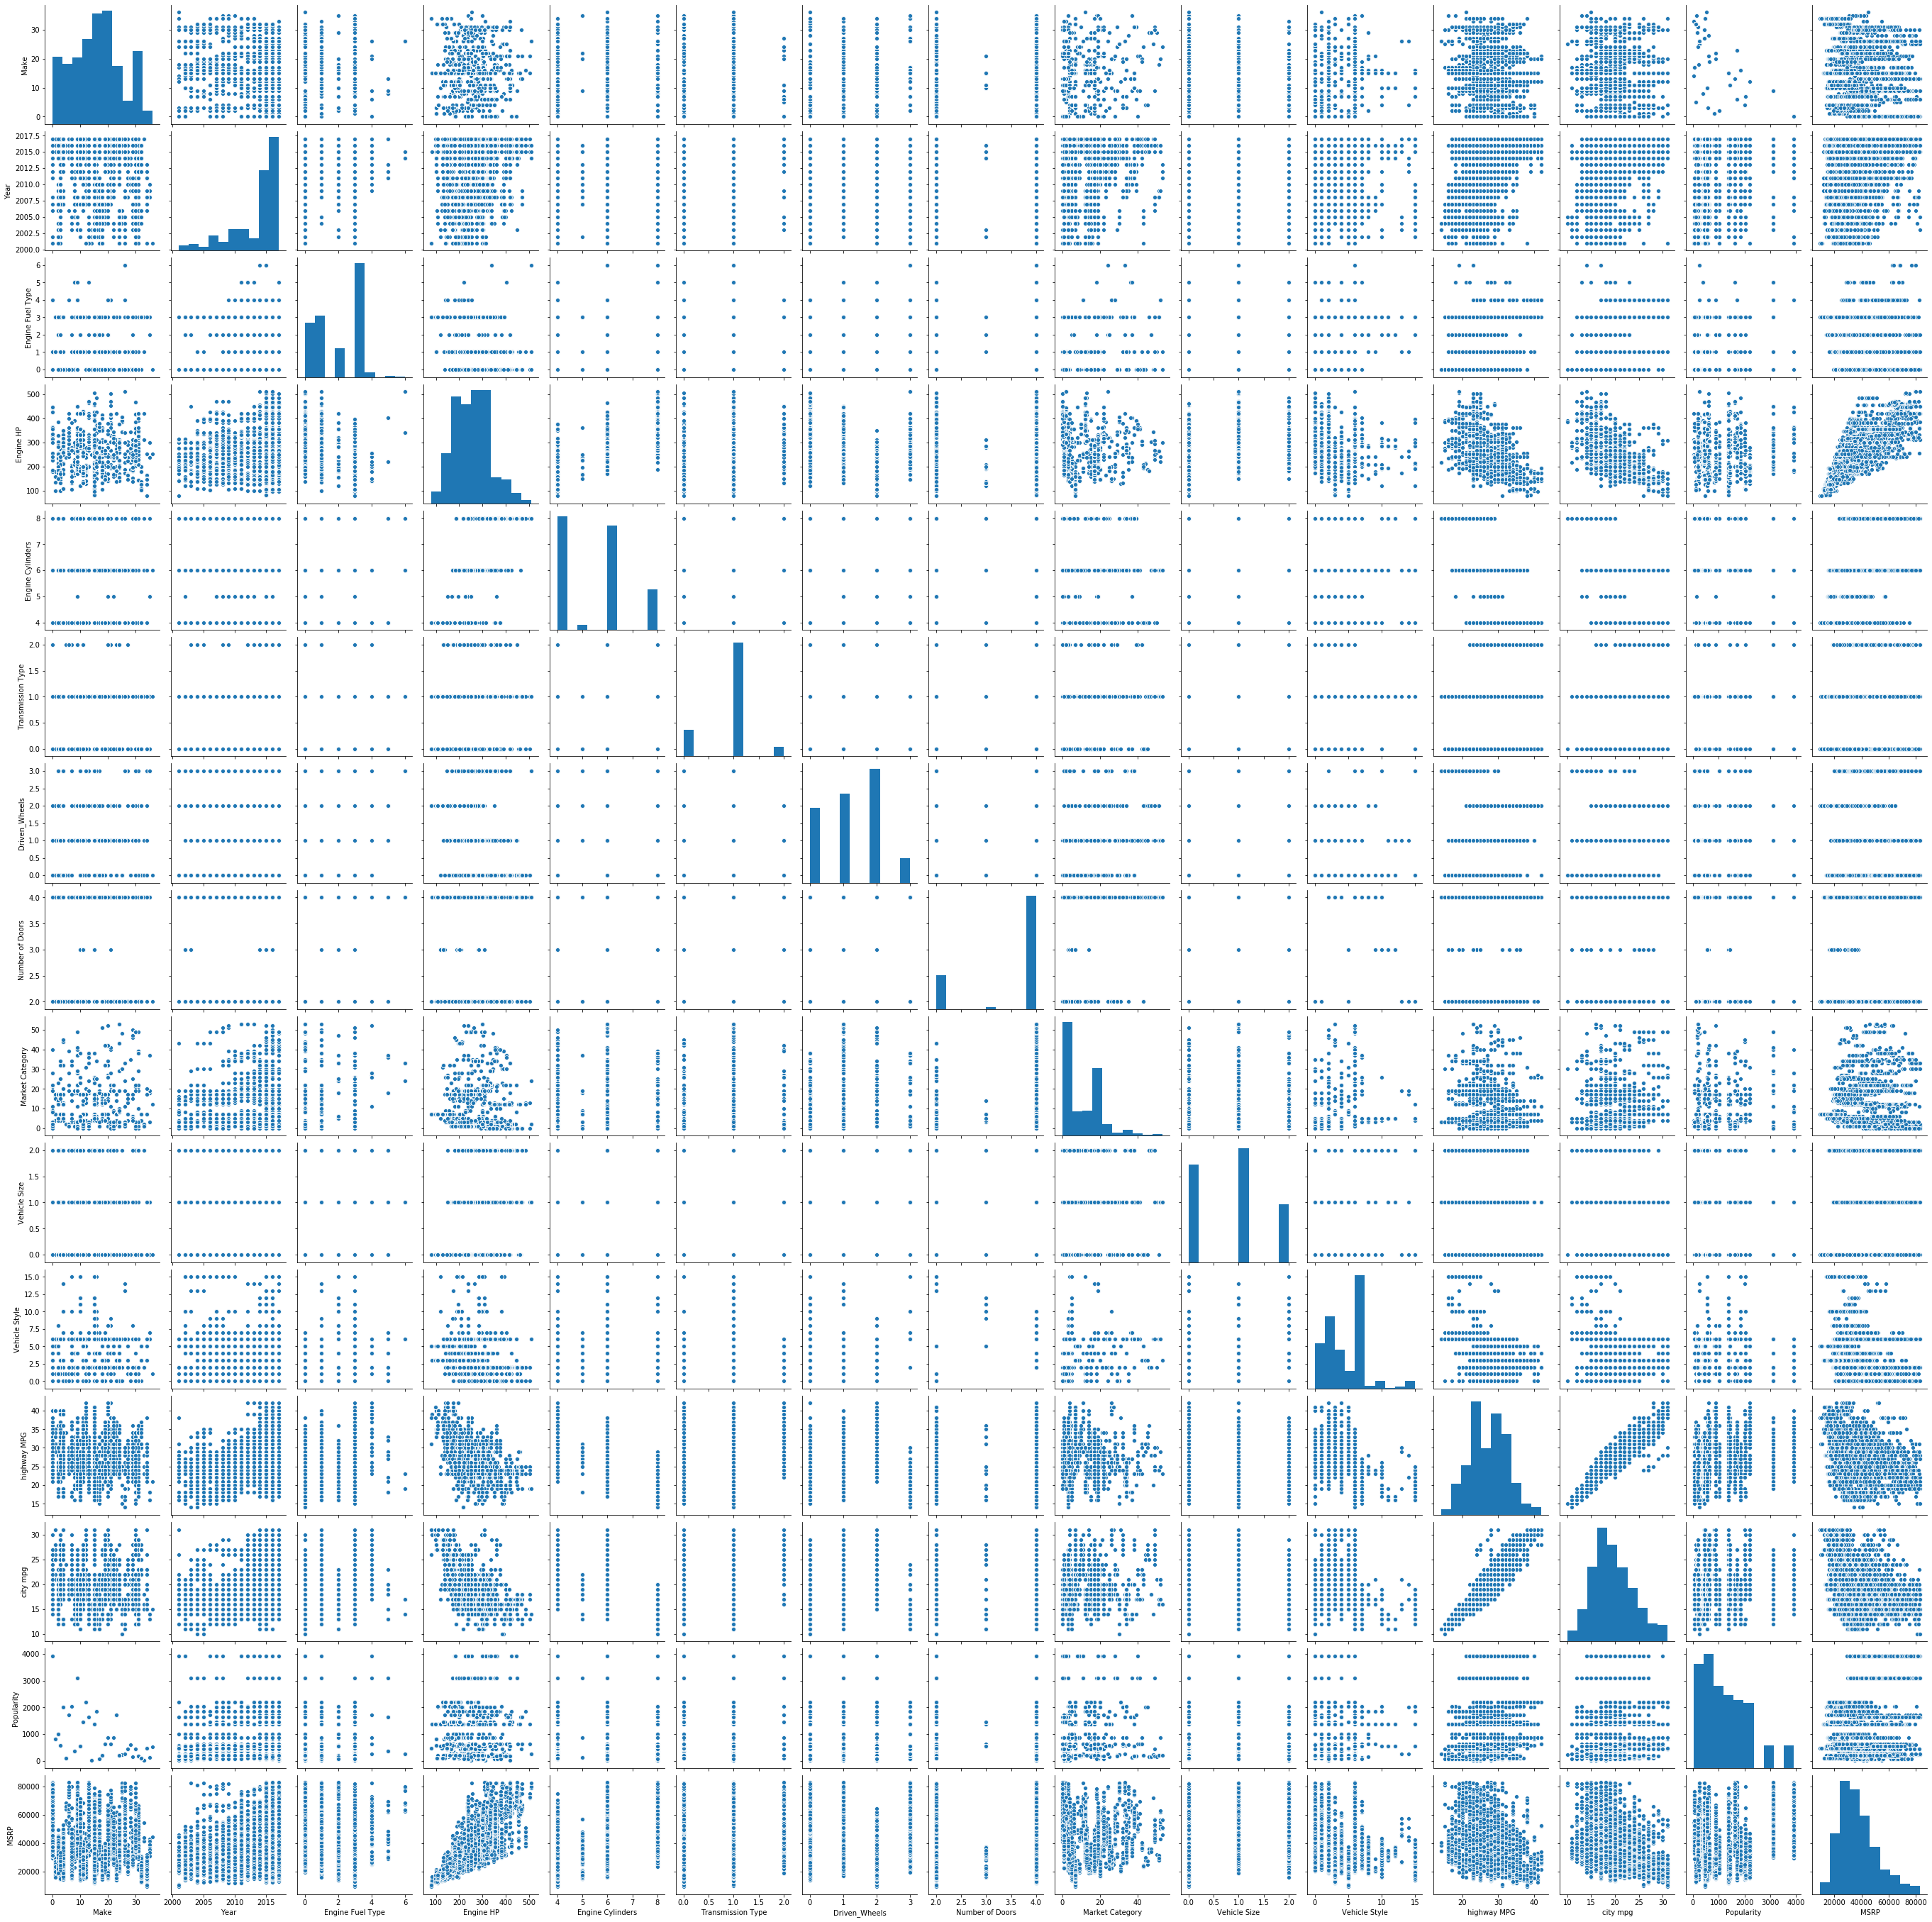

In [15]:
sns.pairplot(df1)

In [16]:
from sklearn.model_selection import train_test_split

x = df1.drop(columns=['MSRP'])
y = df1.MSRP

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [17]:
print(x_train.shape) 
print(x_test.shape)
print(y_train.shape) 
print(y_test.shape)

(3932, 14)
(1937, 14)
(3932,)
(1937,)


## Task 3 Linear Regression.

Train LinearRegression() model on your data.

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
l_r = LinearRegression()
l_r.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred_l_r = l_r.predict(x_test)

Build a bar chart for the feature importance scores. Use the following code.

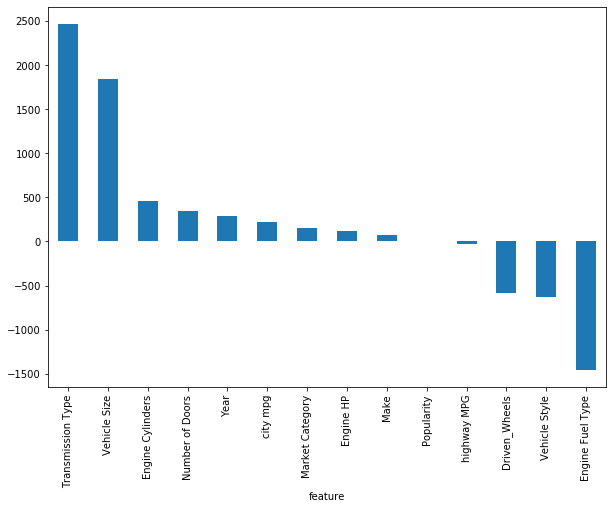

In [21]:
featureImportance = pd.DataFrame({"feature": df1.drop('MSRP',axis=1).columns, 
                                  "importance": l_r.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 7));

## Task 4  Lasso Regression (Least Absolute Shrinkage and Selection Operator)

Regularization strength increases with an increase in λ, however in the case of LASSO, irrelevant feature weights become zero.

In [22]:
from sklearn.linear_model import LassoCV

In [23]:
lasso_r = LassoCV(cv=5, random_state=0)

In [24]:
lasso_r.fit(x_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=0, selection='cyclic',
        tol=0.0001, verbose=False)

In [25]:
y_pred_lasso_r = lasso_r.predict(x_test)

Build a bar chart for the feature importance scores. Use the following code.

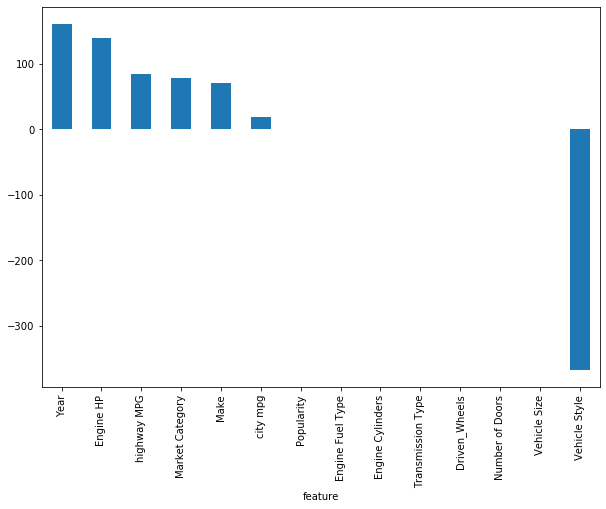

In [26]:
featureImportance = pd.DataFrame({"feature": df1.drop('MSRP',axis=1).columns, 
                                  "importance": lasso_r.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 7));

## Task 5  Ridge Regression

Rigde regression minimizes (penalizes) the effect of irrelevant features as the strength of regularization growth.

In [27]:
from sklearn.linear_model import Ridge

In [28]:
ridge_r = Ridge(alpha=0.05, normalize=True)

ridge_r.fit(x_train,y_train)

y_pred_ridge_r = ridge_r.predict(x_test)

Build a bar chart for the feature importance scores. Use the following code.

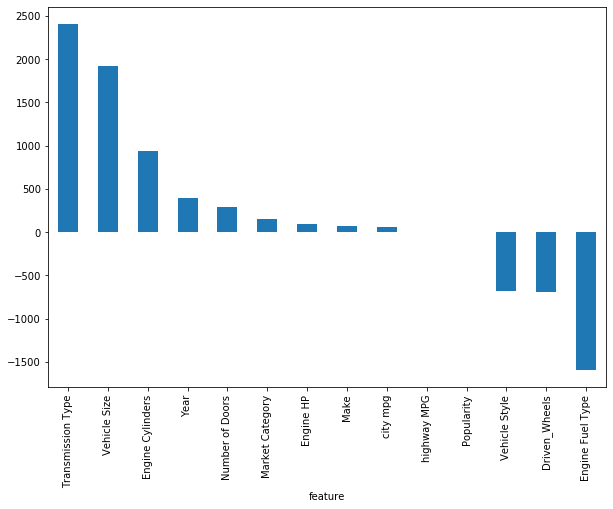

In [29]:
featureImportance = pd.DataFrame({"feature": df1.drop('MSRP',axis=1).columns, 
                                  "importance": ridge_r.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 7));

# Task 6 ElasticNet Regression

This model was introduced to limit sometimes inaccurate feature selection of LASSO, where relevant features are being zeroed. By adding L2 term to the model, the chances of preserving important features increase. Generally in definition of ElasticNet, the ratio of L1/L2 needs to be specified, yet for many applications it is kept at 0.5.

In [30]:
from sklearn.linear_model import ElasticNetCV

In [31]:
elasticnet_r = ElasticNetCV(cv=5, random_state=0)

elasticnet_r.fit(x_train,y_train)

y_pred_elasticnet_r = elasticnet_r.predict(x_test)

Build a bar chart for the feature importance scores. Use the following code.

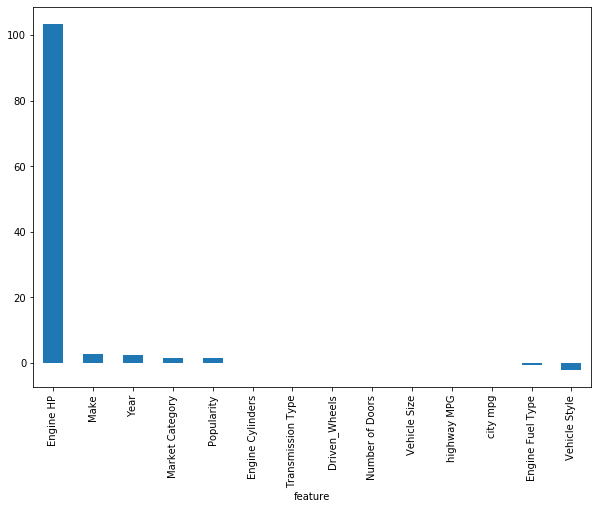

In [32]:
featureImportance = pd.DataFrame({"feature": df1.drop('MSRP',axis=1).columns, 
                                  "importance": elasticnet_r.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 7));

## Task 7 Metrics

Create a method print_metrics(), that prints the following metrics MAE (mean absolute error), MSE (mean squared error), MAPE (mean absolute percentage error), r2_score.

In [33]:
from sklearn import metrics

In [34]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [35]:
print('mean_absolute_error:')
print(metrics.mean_absolute_error(y_test,y_pred_l_r))
print(metrics.mean_absolute_error(y_test,y_pred_lasso_r))
print(metrics.mean_absolute_error(y_test,y_pred_ridge_r))
print(metrics.mean_absolute_error(y_test,y_pred_elasticnet_r))
print('mean_squared_error:')
print(metrics.mean_squared_error(y_test,y_pred_l_r))
print(metrics.mean_squared_error(y_test,y_pred_lasso_r))
print(metrics.mean_squared_error(y_test,y_pred_ridge_r))
print(metrics.mean_squared_error(y_test,y_pred_elasticnet_r))
print('r2_score:')
print(metrics.r2_score(y_test,y_pred_l_r))
print(metrics.r2_score(y_test,y_pred_lasso_r))
print(metrics.r2_score(y_test,y_pred_ridge_r))
print(metrics.r2_score(y_test,y_pred_elasticnet_r))
print('mean_absolute_percentage_error:')
print(mean_absolute_percentage_error(y_test,y_pred_l_r))
print(mean_absolute_percentage_error(y_test,y_pred_lasso_r))
print(mean_absolute_percentage_error(y_test,y_pred_ridge_r))
print(mean_absolute_percentage_error(y_test,y_pred_elasticnet_r))

mean_absolute_error:
6020.999365408697
6359.898178285618
6057.277196624051
7162.29768099456
mean_squared_error:
67405278.76522504
73880335.16998011
67983535.43499902
86530900.51585694
r2_score:
0.6563777398701424
0.6233688486226199
0.6534298718775629
0.558878115319499
mean_absolute_percentage_error:
16.219352047802413
17.22108362935616
16.32275806380119
20.25022878139795


## Task 8 Conclusion

Analyze the work that you have done and make a conclusion. Make a short report on your work. 

We can see that different models get different results for feature importance. The most precise model is the Linear Regression Model.